Name- Pratima Vishwakarma

email- pratima8114@gmail.com

linkedin id - https://www.linkedin.com/in/pratima-vishwakarma-a9a418179

Kaggle id - https://www.kaggle.com/pratimavishwakarma/3-python-project

git-hub - 8114Pratima

# HR Analytics Employee Attrition & Performance.


# CONTENTS :
1 ) Exploratory Data Analysis

2 ) Corelation b/w Features

3 ) Feature Selection

4 ) Preparing Dataset

5 ) Modelling Algorithms.

6 )Conclusions

# 1 - Exploratory Data Analysis
## 1.A - Importing Various Modules

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno


#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
#style.use('fivethirtyeight')
#sns.set(style='whitegrid',color_codes=True)
df=sns.load_dataset('df')
#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

UsageError: Line magic function `%` not found.


In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Reading the data from a CSV file

In [3]:
df = pd.read_csv('HR_Employee_Attrition_data.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(2940, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Missing Values Treatment

In [7]:
df.info()  # no null or Nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

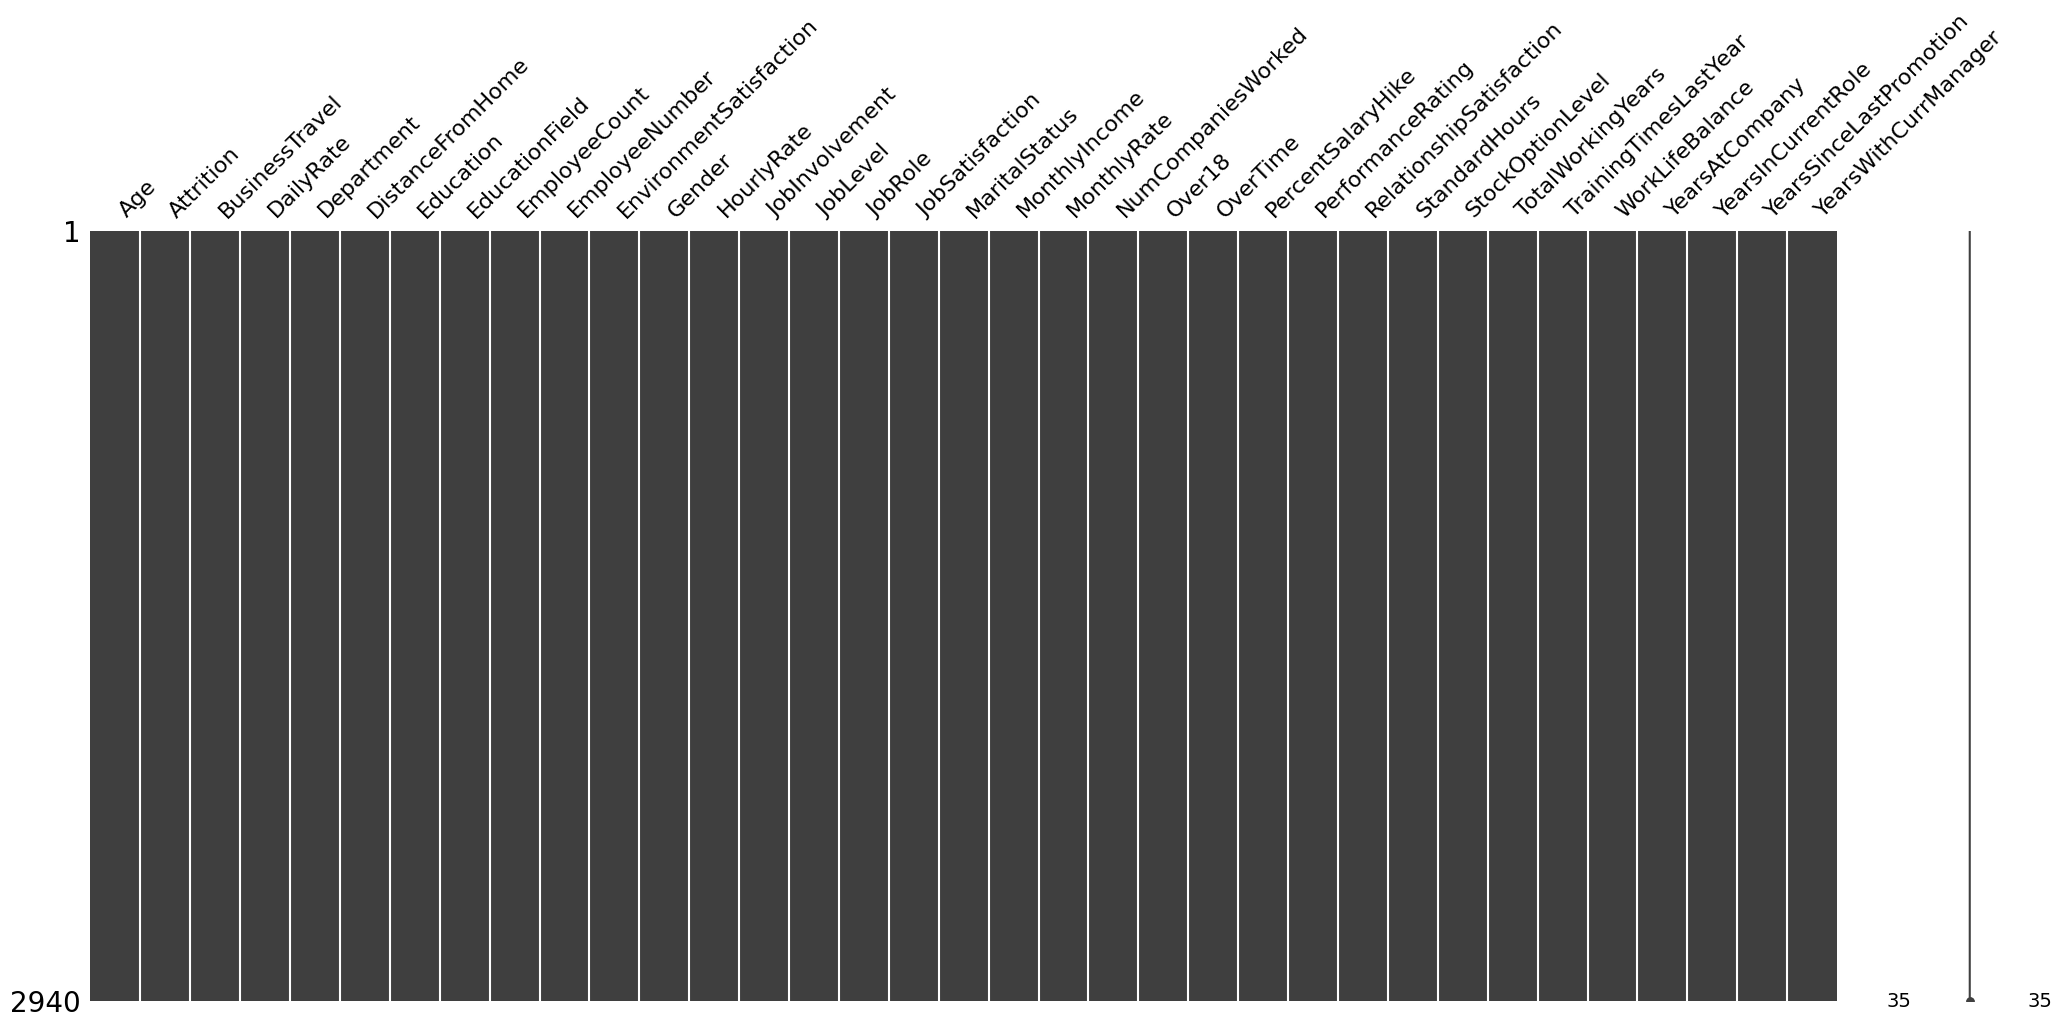

In [9]:
msno.matrix(df) # just to visualize.

#  The Features and the 'Target'

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

Hence this is a Binary Classification problem.

 # Univariate Analysis
In this section I have done the univariate analysis i.e. I have analysed the range or distribution of the values that various features take. To better analyze the results I have plotted various graphs and visualizations wherever necessary.

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let us first analyze the various numeric features. To do this we can actually plot a boxplot showing all the numeric features.

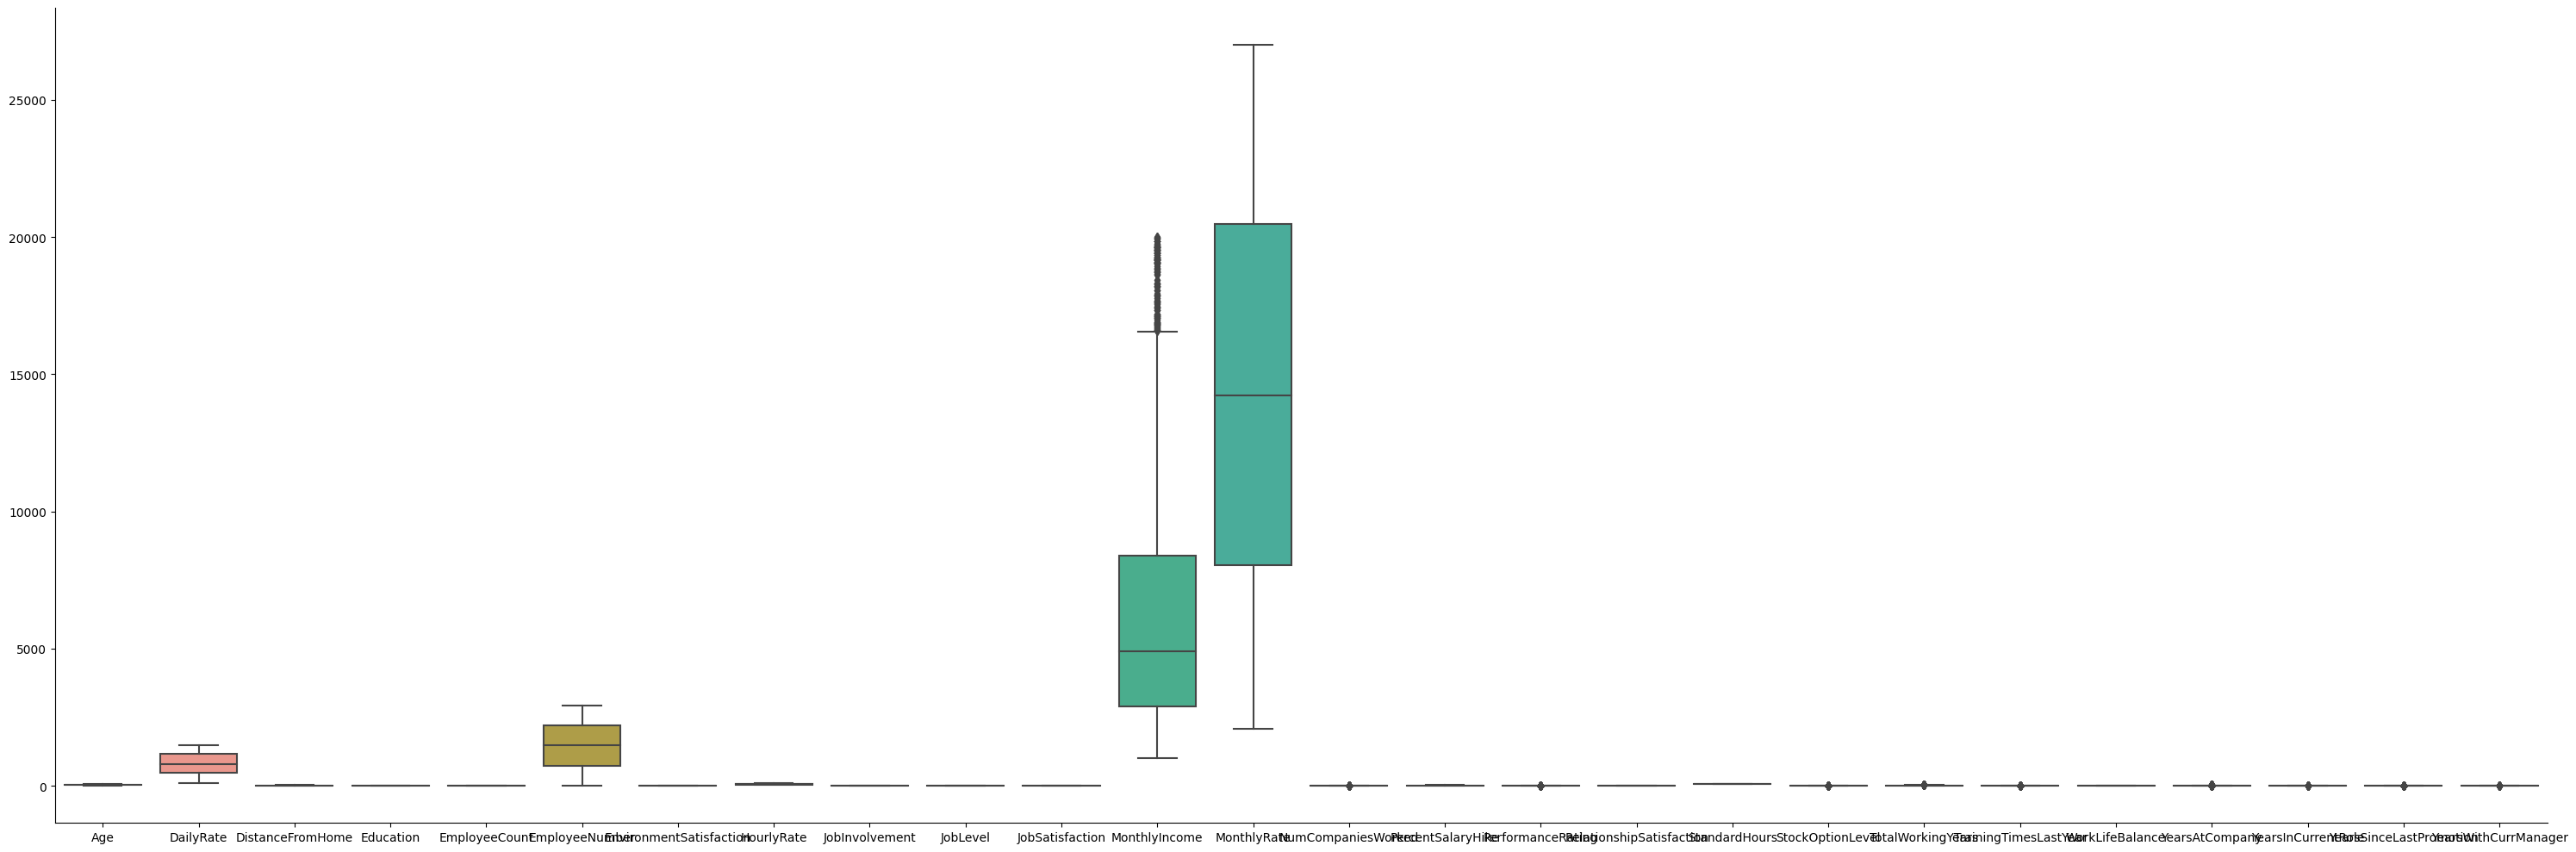

In [13]:
sns.catplot(data=df,kind='box',height=10,aspect=3,)

<Axes: xlabel='Age', ylabel='Density'>

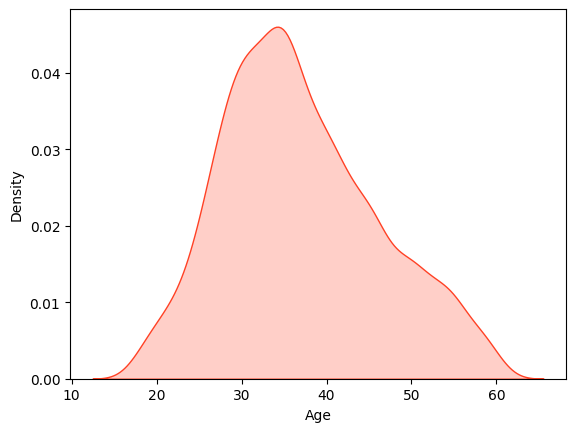

In [14]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

We can also plot a kdeplot showing the distribution of the feature. Below I have plotted a kdeplot for the 'Age' feature. Similarly we plot for other numeric features also. We can also use a distplot from seaborn library.

<Axes: xlabel='Age', ylabel='Density'>

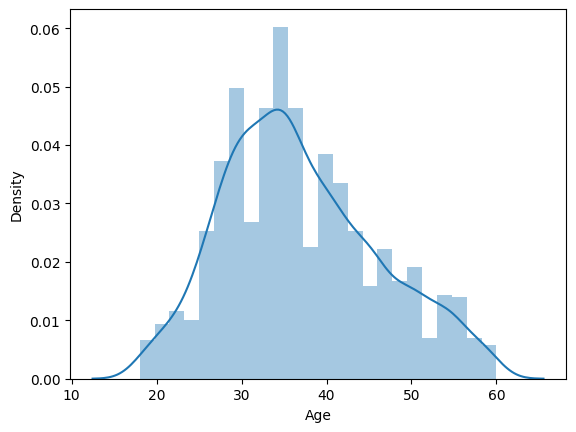

In [15]:
sns.distplot(df['Age'])

Similarly we can do this for all the numerical features. Below I have plotted the subplots for the other features.

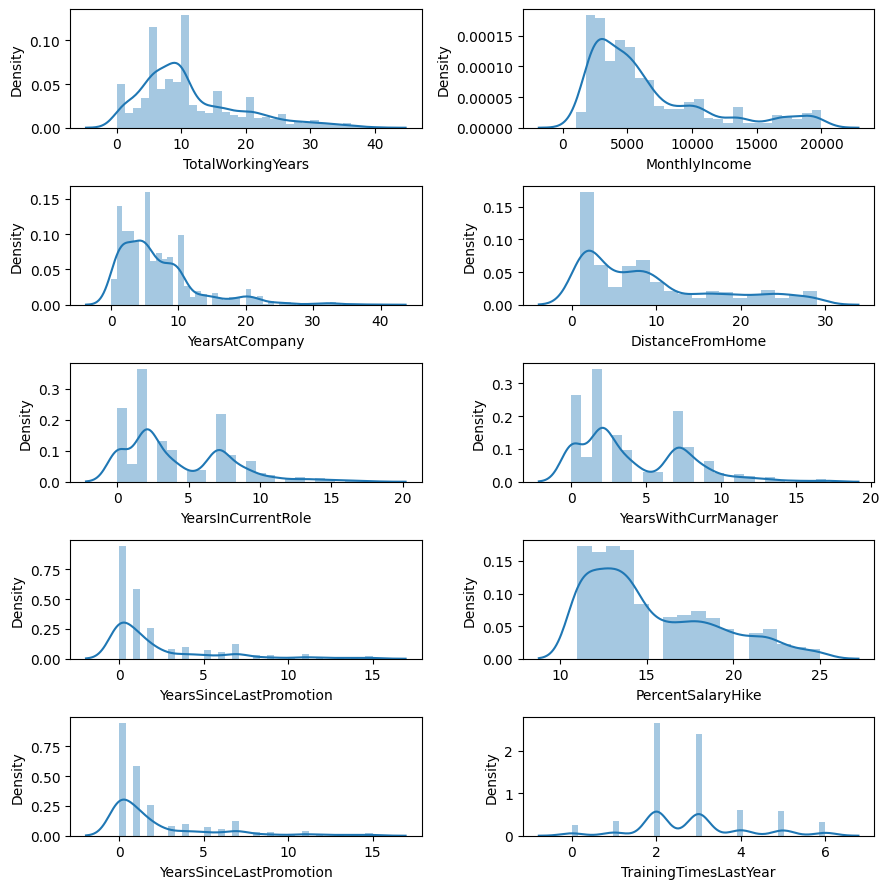

In [16]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features. Note that in these cases the best way is to use a count plot to show the relative count of observations of different categories.

In [17]:
cat_df=df.select_dtypes(include='object')

In [18]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [19]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.catplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.catplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

I have made a function that accepts the name of a string. In our case this string will be the name of the column or attribute which we want to analyze. The function then plots the countplot for that feature which makes it easier to visualize.

In [20]:
cat_df=df.select_dtypes(include='object')

In [21]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [22]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

I have made a function that accepts the name of a string. In our case this string will be the name of the column or attribute which we want to analyze. The function then plots the countplot for that feature which makes it easier to visualize.

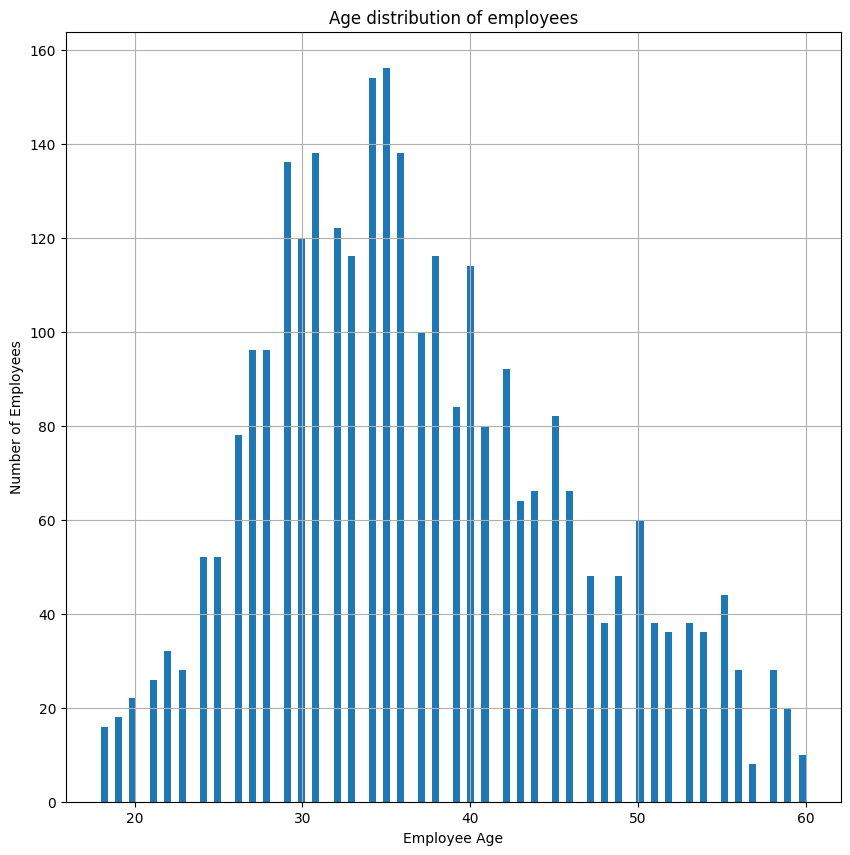

In [23]:
#age distribution of employees
plt.figure(figsize=(10,10))
df["Age"].hist(bins=100)
plt.title("Age distribution of employees")
plt.xlabel("Employee Age")
plt.ylabel("Number of Employees")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'grid_ms'

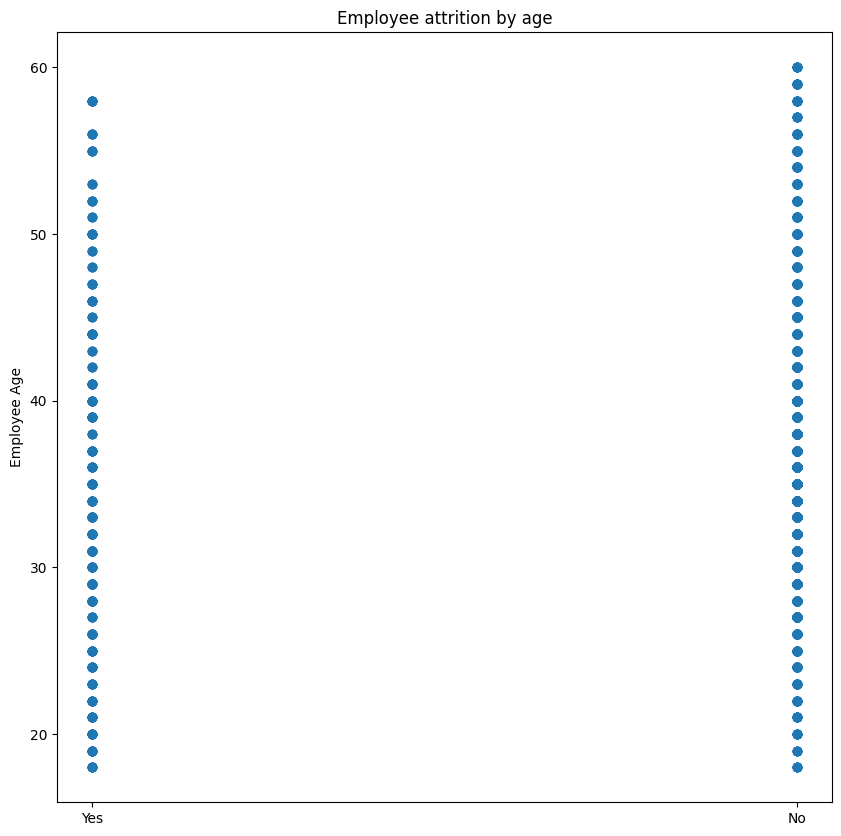

In [24]:
#attrition by age
plt.figure(figsize=(10,10))
plt.scatter(df.Attrition,df.Age)
plt.title("Employee attrition by age")
plt.ylabel("Employee Age")
plt.grid_ms(b=True,axis="y")
plt.show()

In [ ]:
#employees who left Attrition
plt.figure(figsize=(10,10))
df.Attrition.value_counts().plot(kind="bar")
plt.title("Employees who left")
plt.ylabel("Number of employees")
plt.show()

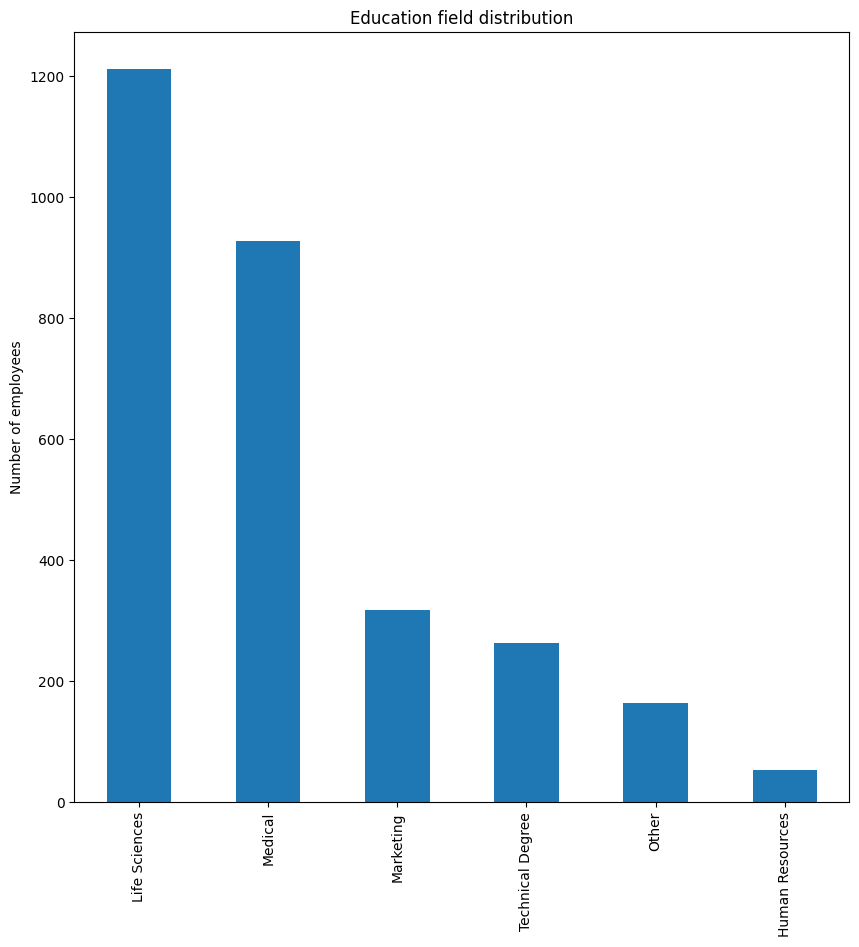

In [25]:
#education field distribution
plt.figure(figsize=(10,10))
df.EducationField.value_counts().plot(kind="bar")
plt.title("Education field distribution")
plt.ylabel("Number of employees")
plt.show()

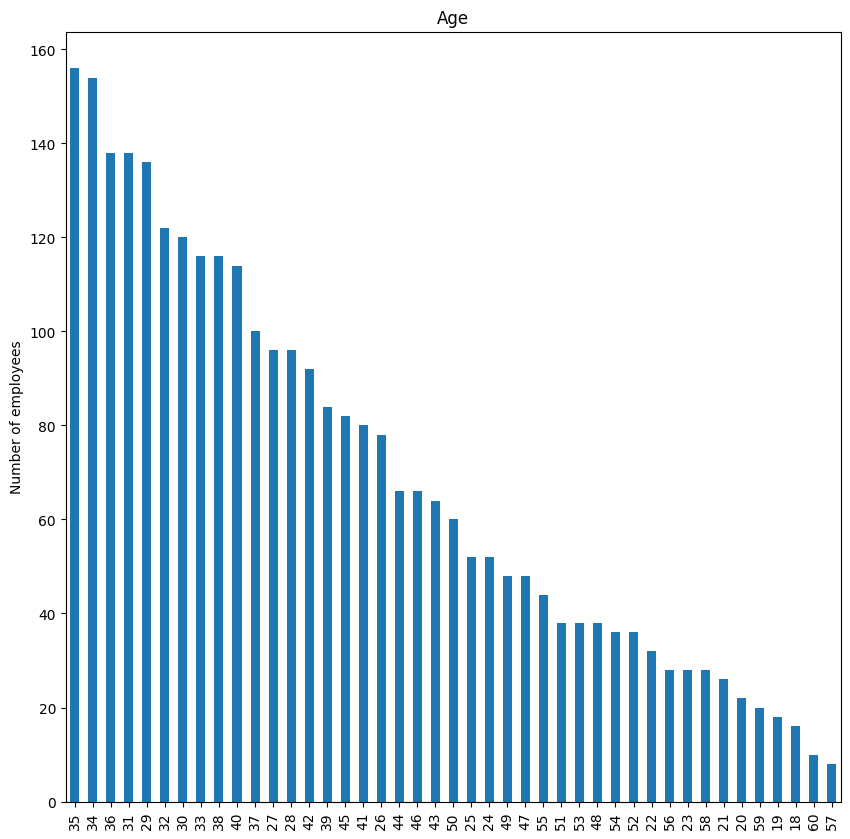

In [26]:
#BusinessTravel
plt.figure(figsize=(10,10))
df.Age.value_counts().plot(kind="bar")
plt.title("Age")
plt.ylabel("Number of employees")
plt.show()

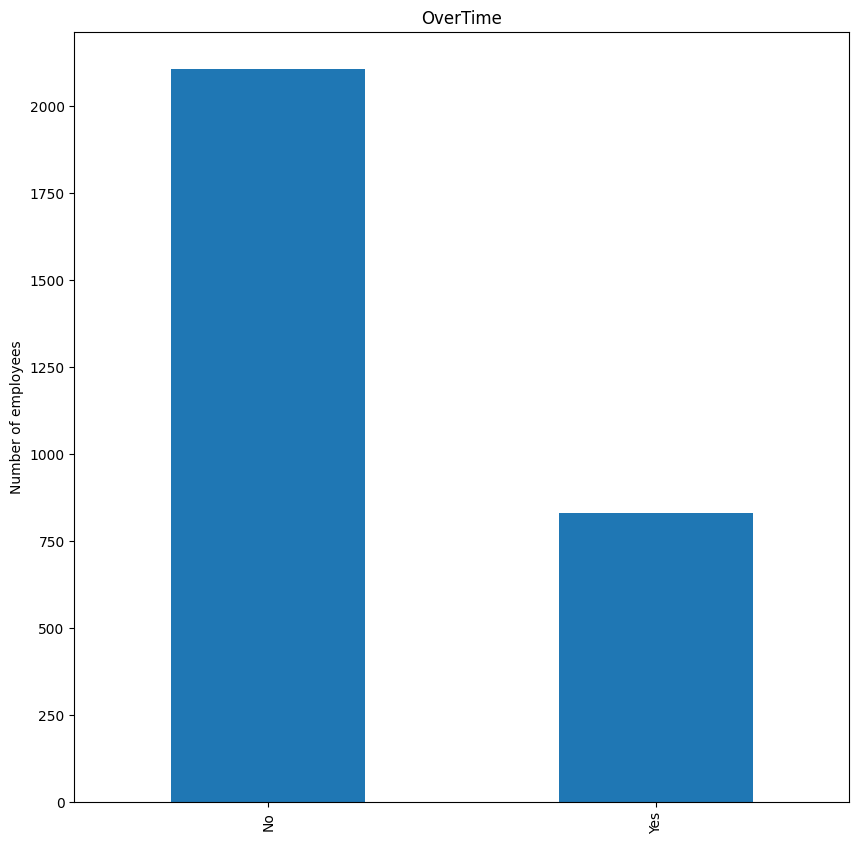

In [27]:
plt.figure(figsize=(10,10))
df.OverTime.value_counts().plot(kind="bar")
plt.title("OverTime")
plt.ylabel("Number of employees")
plt.show()

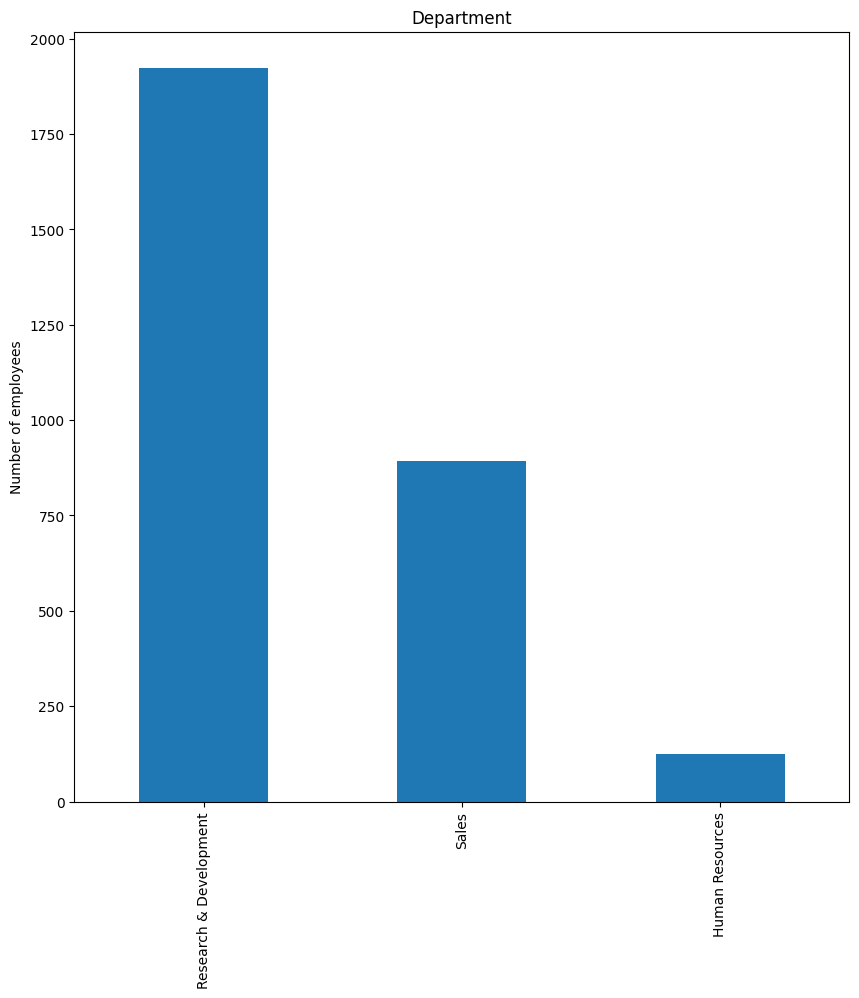

In [28]:
plt.figure(figsize=(10,10))
df.Department.value_counts().plot(kind="bar")
plt.title("Department")
plt.ylabel("Number of employees")
plt.show()

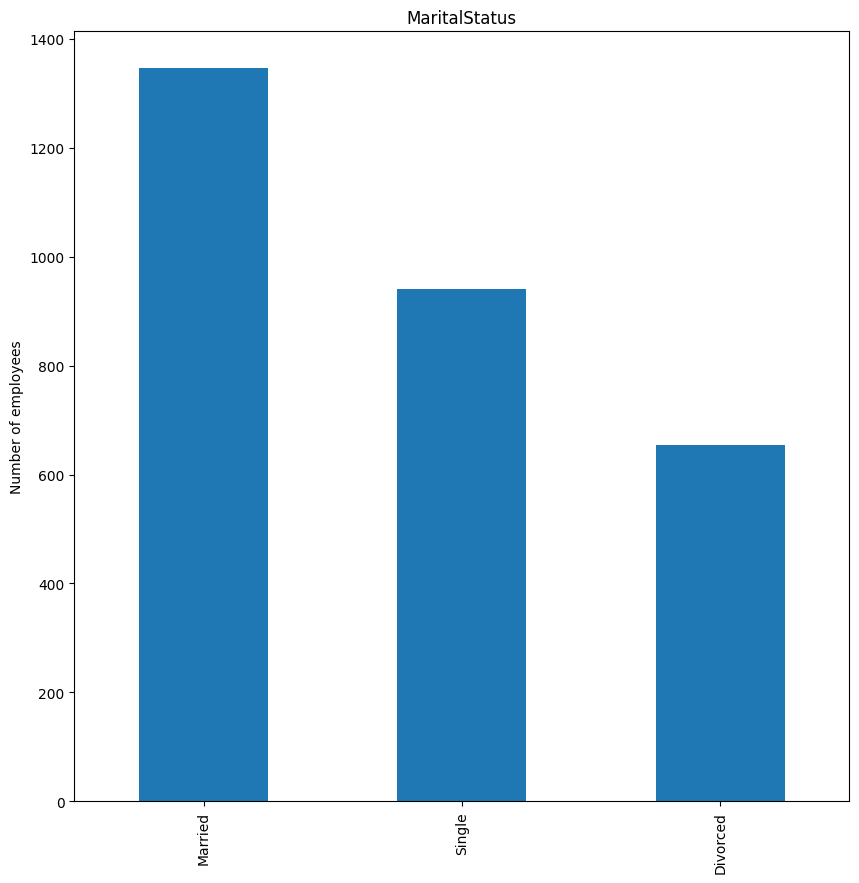

In [29]:
plt.figure(figsize=(10,10))
df.MaritalStatus.value_counts().plot(kind="bar")
plt.title("MaritalStatus")
plt.ylabel("Number of employees")
plt.show()

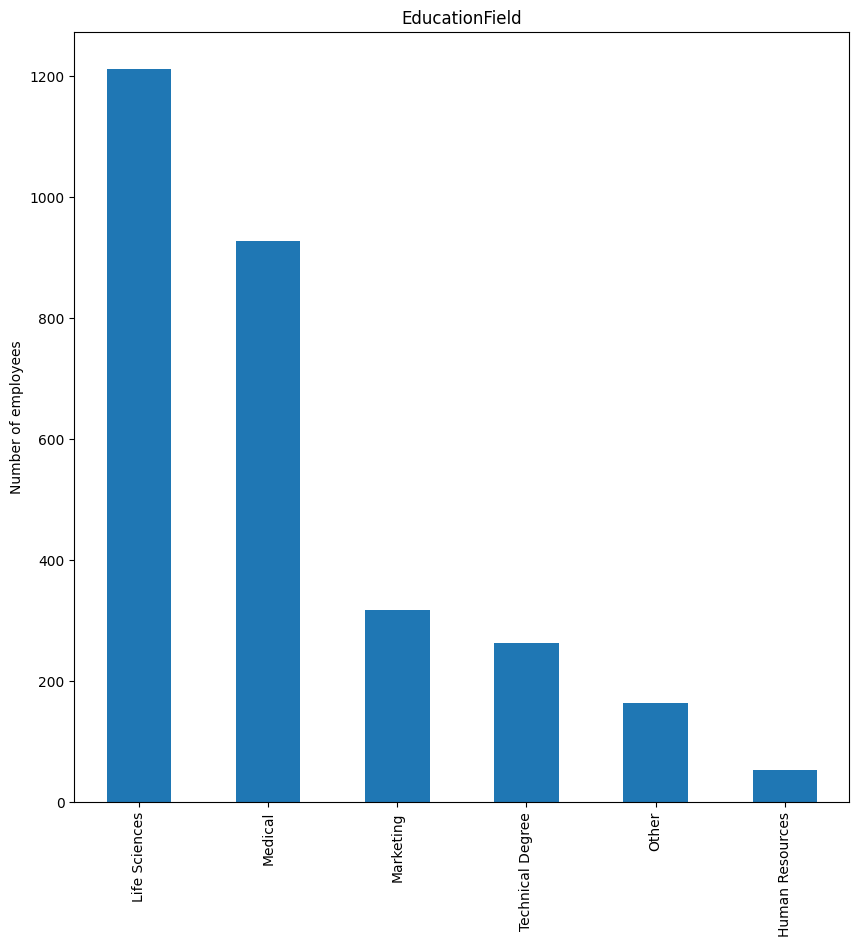

In [30]:
# JobRole
plt.figure(figsize=(10,10))
df.EducationField.value_counts().plot(kind="bar")
plt.title("EducationField")
plt.ylabel("Number of employees")
plt.show()

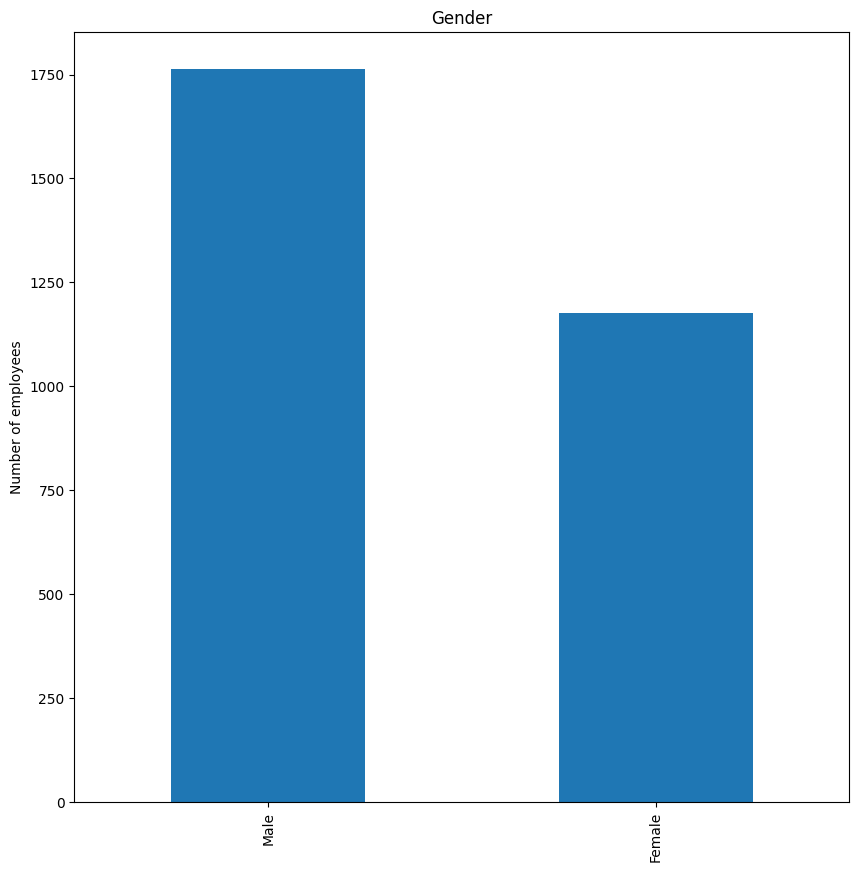

In [31]:
plt.figure(figsize=(10,10))
df.Gender.value_counts().plot(kind="bar")
plt.title("Gender")
plt.ylabel("Number of employees")
plt.show()

Note that males are present in higher number.

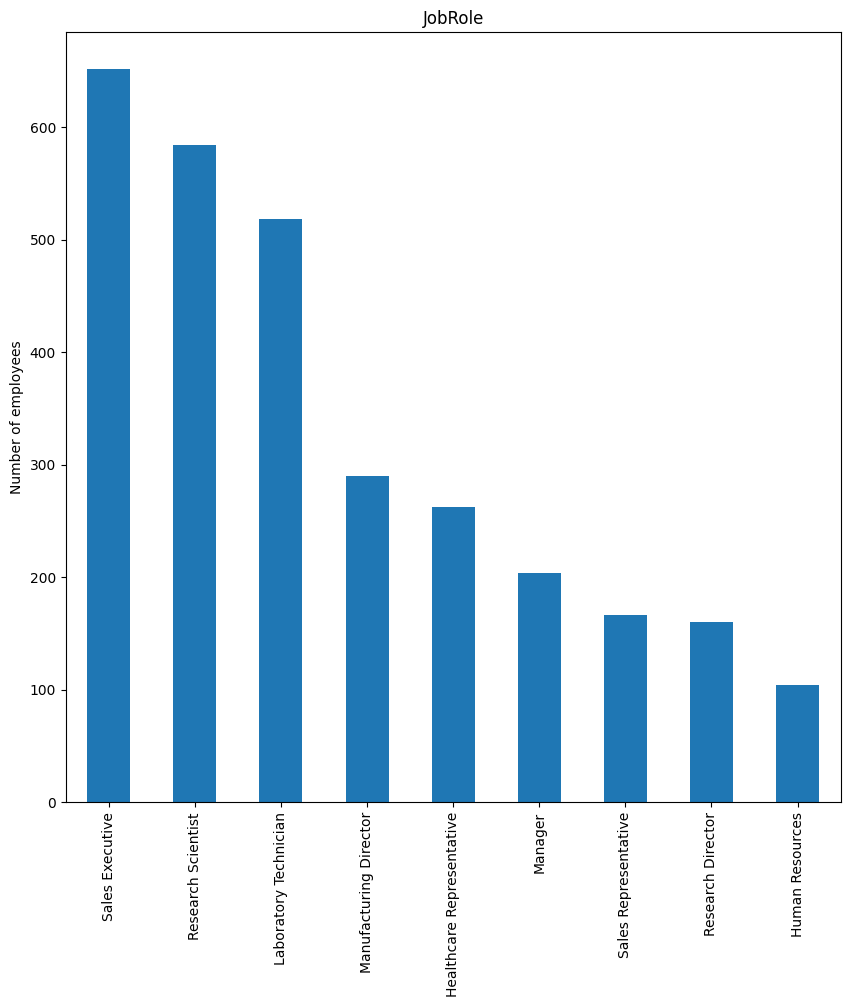

In [32]:
plt.figure(figsize=(10,10))
df.JobRole.value_counts().plot(kind="bar")
plt.title("JobRole")
plt.ylabel("Number of employees")
plt.show()

Similarly we can continue for other categorical features.
Note that the same function can also be used to better analyze the numeric discrete features like 'Education' ,'JobSatisfaction' etc...

In [33]:
# just uncomment the following cell.
# num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
# similarly we can intrepret these graphs.

# 2- Corelation b/w Features

<Axes: >

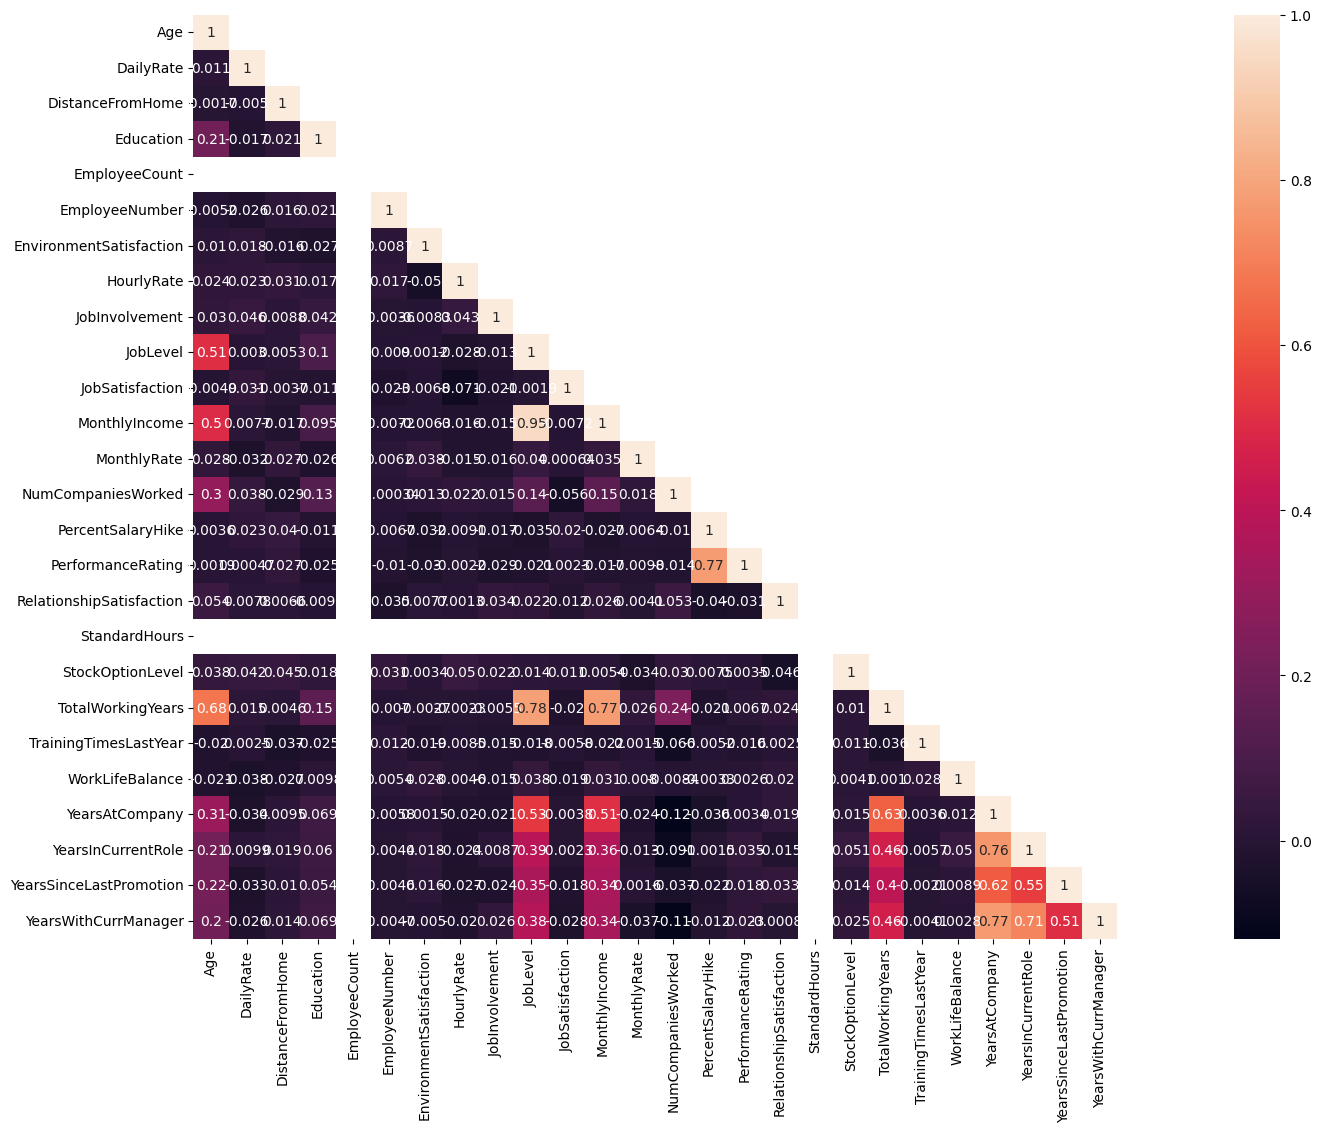

In [34]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

BREAKING IT DOWN
Firstly calling .corr() method on a pandas data frame returns a corelation data frame containing the corelation values b/w the various attributes. now we obtain a numpy array from the corelation data frame using the np.array method. nextly using the np.tril_indices.from() method we set the values of the lower half of the mask numpy array to False. this is bcoz on passing the mask to heatmap function of the seaborn it plots only those squares whose mask is False. therefore if we don't do this then as the mask is by default True then no square will appear. Hence in a nutshell we obtain a numpy array from the corelation data frame and set the lower values to False so that we can visualise the corelation. In order for a full square just use the [:] operator in mask in place of tril_ind... function. in next step we get the refernce to the current figure using the gcf() function of the matplotlib library and set the figure size. in last step we finally pass the necessary parameters to the heatmap function.

DATA=the corelation data frame containing the 'CORELATION' values.

MASK= explained earlier.

vmin,vmax= range of values on side bar

SQUARE= to show each individual unit as a square.

ANNOT- whether to dispaly values on top of square or not. In order to dispaly pass it either True or the cor_mat.

CBAR= whether to view the side bar or not.

SOME INFERENCES FROM THE ABOVE HEATMAP
Self relation ie of a feature to itself is equal to 1 as expected.

JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly related to YearsAtCompany.

YearsAtCompany is related to YearsInCurrentRole.

Note that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 3- Feature Selection

# Plotting the Features against the 'Target' variable.
Age-

Note that Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

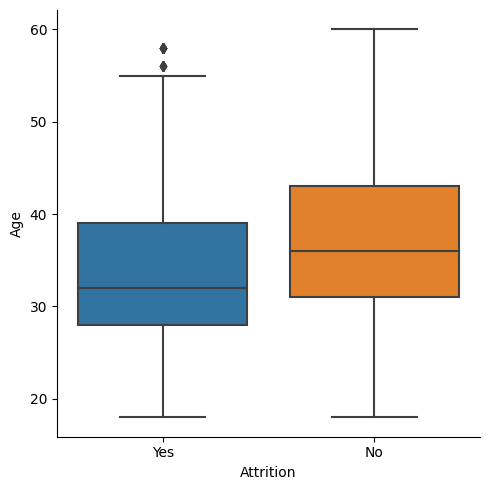

In [36]:
sns.catplot(data=df,y='Age',x='Attrition',height=5,aspect=1,kind='box')

Note that the median as well the maximum age of the peole with 'No' attrition is higher than that of the 'Yes' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

# Department
Note that both Attrition(Target) as well as the Deaprtment are categorical. In such cases a cross-tabulation is the most reasonable way to analyze the trends; which shows clearly the number of observaftions for each class which makes it easier to analyze the results.

In [37]:
df.Department.value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

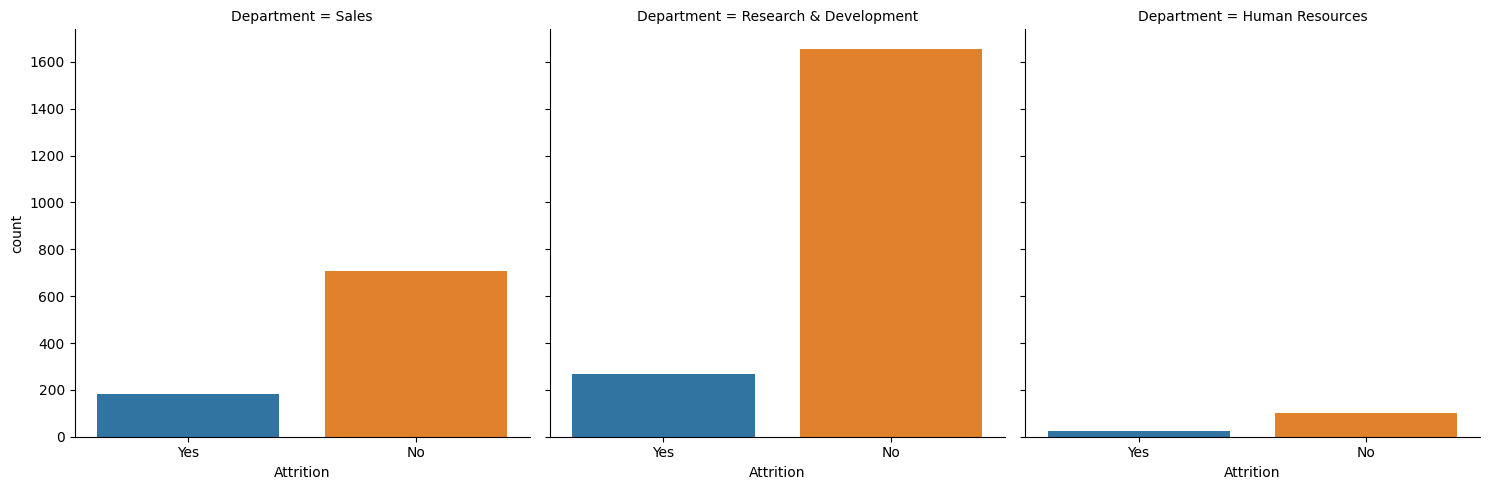

In [38]:
sns.catplot(data=df,kind='count',x='Attrition',col='Department')

In [39]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise Department

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


Note that most of the observations corresspond to 'No' as we saw previously also. About 81 % of the people in HR dont want to leave the organisation and only 19 % want to leave. Similar conclusions can be drawn for other departments too from the above cross-tabulation.

## Gender

In [40]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise is Gender

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


About 85 % of females want to stay in the organisation while only 15 % want to leave the organisation. All in all 83 % of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

### Job Level

In [41]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') # set normalize=index to view rowwise is job level

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.

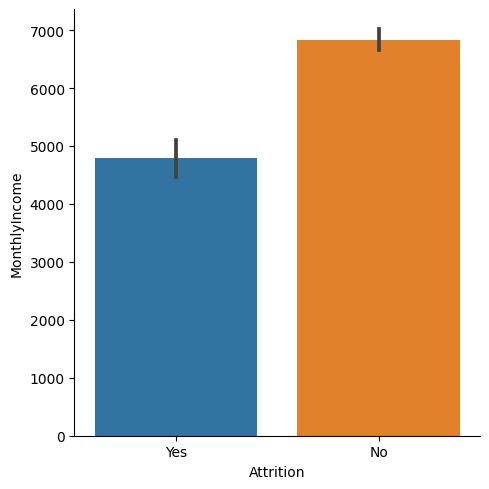

In [42]:
sns.catplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

Note that the average income for 'No' class is quite higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

### Job Satisfaction

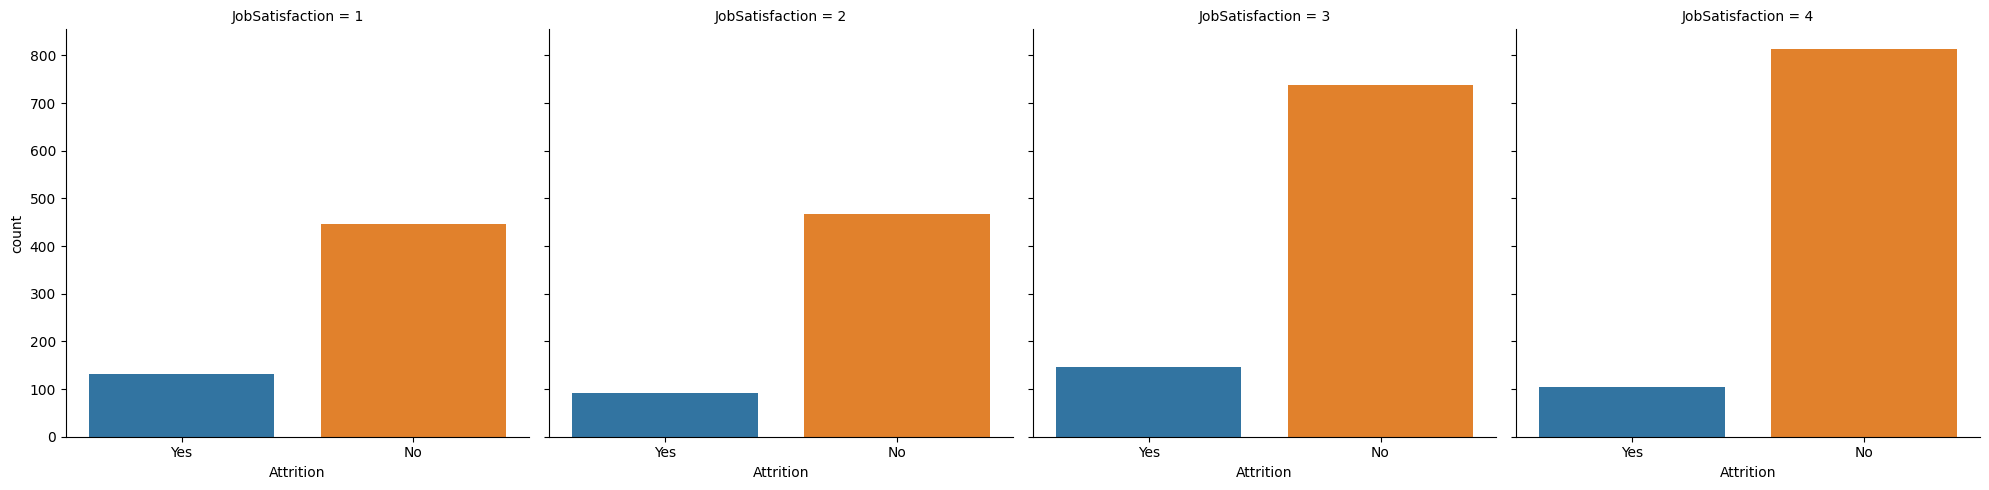

In [43]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [44]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view 

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


Note this shows an interesting trend. Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

## Environment Satisfaction

In [45]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion.

### Job Involvement

In [46]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') 

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


##  Work Life Balance

In [47]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

## RelationshipSatisfaction

In [48]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Notice that I have plotted just some of the important features against out 'Target' variable i.e. Attrition in our case. Similarly we can plot other features against the 'Target' variable and analye the trends i.e. how the feature effects the 'Target' variable.

##  Feature Selection

The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful. The better features we use the better our model will perform.

We can also use the Recusrive Feature Elimination technique (a wrapper method) to choose the desired number of most important features. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

We can use it directly from the scikit library by importing the RFE module or function provided by the scikit. But note that since it tries different combinations or the subset of features;it is quite computationally expensive.

In [49]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

##  Preparing Dataset

Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form. Also for better performance we will do the feature scaling ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library

# Feature Encoding

I have used the Label Encoder from the scikit library to encode all the categorical features.

In [50]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    

In [51]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [54]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


## Feature Scaling.

The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below I have used the StandardScaler to scale the data.

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].values

### Splitting the data into training and validation sets

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


# 5 Modelling
## 5.1 ) Handling the Imbalanced dataset
Note that we have a imbalanced dataset with majority of observations being of one type ('NO') in our case. In this dataset for example we have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset.

To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. In this section I have discussed two approaches to curb such datasets.

### 5.1.1 ) Oversampling the Minority or Undersampling the Majority Class
In an imbalanced dataset the main problem is that the data is highly skewed ie the number of observations of certain class is more than that of the other. Therefore what we do in this approach is to either increase the number of observations corressponding to the minority class (oversampling) or decrease the number of observations for the majority class (undersampling).

Note that in our case the number of observations is already pretty low and so oversampling will be more appropriate.

Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

One thing more to take of is to use the SMOTE before the cross validation step; just to ensure that our model does not overfit the data; just as in the case of feature selection.

oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)
### 5.1.2 ) Using the Right Evaluation Metric
Another important point while dealing with the imbalanced classes is the choice of right evaluation metrics.

Note that accuracy is not a good choice. This is because since the data is skewed even an algorithm classifying the target as that belonging to the majority class at all times will achieve a very high accuracy. For eg if we have 20 observations of one type 980 of another ; a classifier predicting the majority class at all times will also attain a accuracy of 98 % but doesnt convey any useful information.

Hence in these type of cases we may use other metrics such as -->

'Precision'-- (true positives)/(true positives+false positives)

'Recall'-- (true positives)/(true positives+false negatives)

'F1 Score'-- The harmonic mean of 'precision' and 'recall'

'AUC ROC'-- ROC curve is a plot between 'senstivity' (Recall) and '1-specificity' (Specificity=Precision)

'Confusion Matrix'-- Plot the entire confusion matrix

## 5.2 ) Building A Model & Making Predictions
In this section I have used different models from the scikit library and trained them on the previously oversampled data and then used them for the prediction purposes.

In [59]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE

In [60]:
def compare(model):
    clf=model
    clf.fit(X_train_smote,y_train_smote)
    pred=clf.predict(X_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))  

In [61]:
# Preprocess the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Attrition', axis=1))
X = scaled_df
y = df['Attrition'].values

# Oversample the minority class
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
x_train_smote, x_test, y_train_smote, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

# Define the compare function
def compare(model, x_train, y_train, x_test, y_test):
    clf = model
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)

    # Calculate various metrics
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    auroc = roc_auc_score(y_test, pred)

    return acc, prec, rec, auroc

# Define the models to compare
models = [SVC(kernel='rbf'), RandomForestClassifier(), GradientBoostingClassifier()]
model_names = ['rbfSVM', 'RandomForestClassifier', 'GradientBoostingClassifier']

# Compare the models and store the results in a dataframe
acc = []
prec = []
rec = []
auroc = []
for i in range(len(models)):
    acc_i, prec_i, rec_i, auroc_i = compare(models[i], x_train_smote, y_train_smote, x_test, y_test)
    acc.append(acc_i)
    prec.append(prec_i)
    rec.append(rec_i)
    auroc.append(auroc_i)

d = {'Modelling Algo': model_names, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'Area Under ROC Curve': auroc}
met_df = pd.DataFrame(d)
met_df


,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.944039,0.919304,0.969950,0.944754
1,RandomForestClassifier,0.991890,0.990017,0.993322,0.991929
2,GradientBoostingClassifier,0.926196,0.934932,0.911519,0.925791


##  Comparing Different Models

In [62]:
def comp_models(df, metric):
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    sns.barplot(x=metric,y='Modelling Algo',data=df)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.title("Comparison of Models based on " + metric, fontsize=15)
    plt.show()


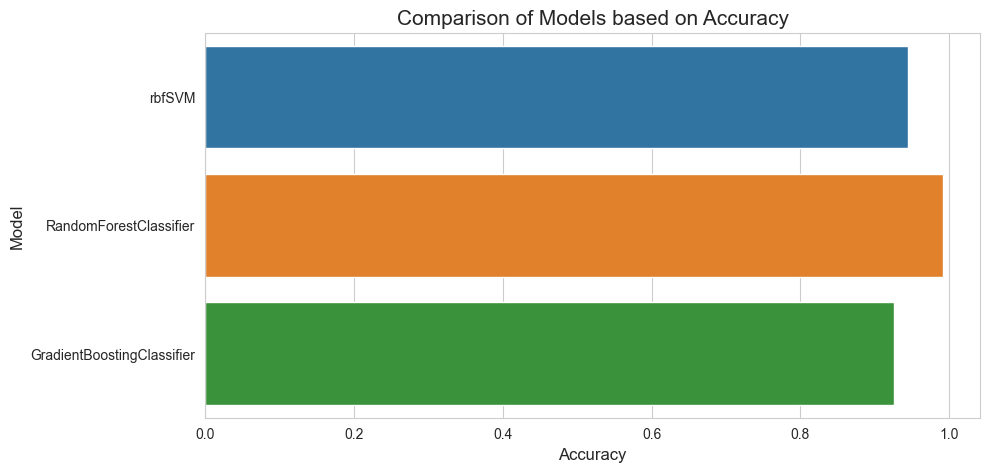

In [63]:
comp_models(met_df,'Accuracy')

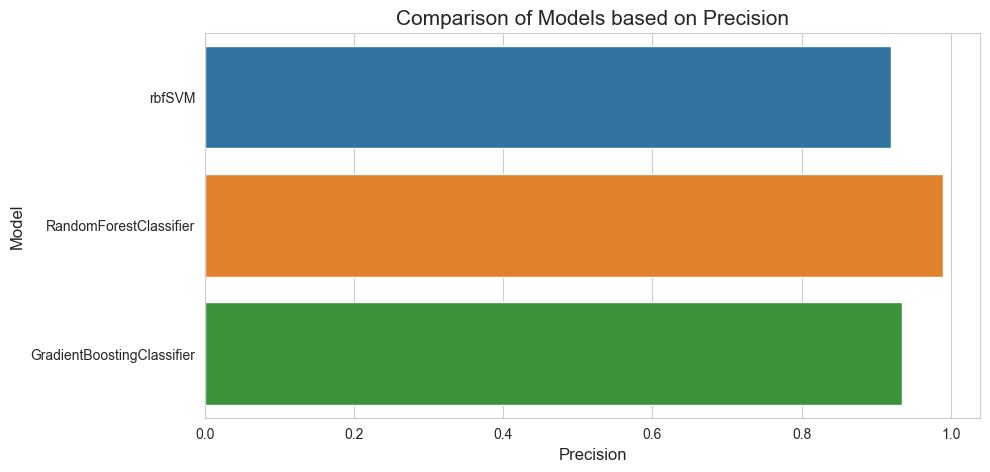

In [64]:
comp_models(met_df,'Precision')

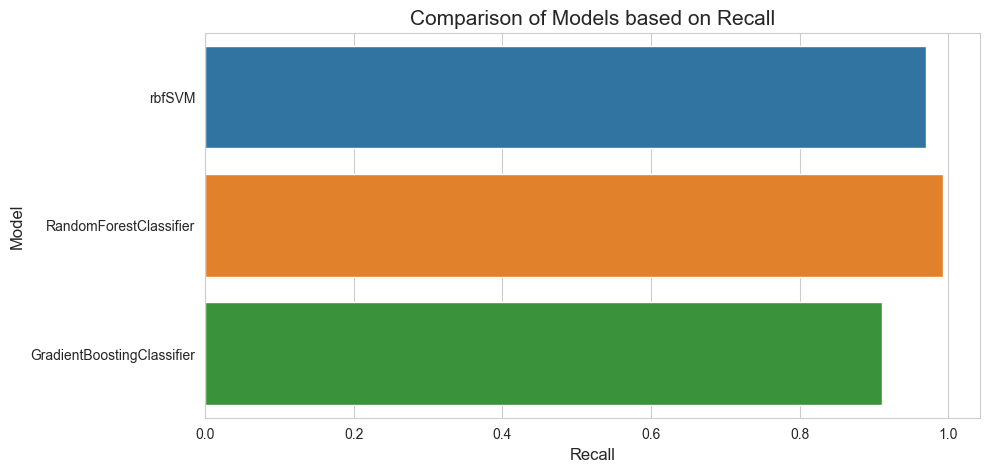

In [65]:
comp_models(met_df,'Recall')

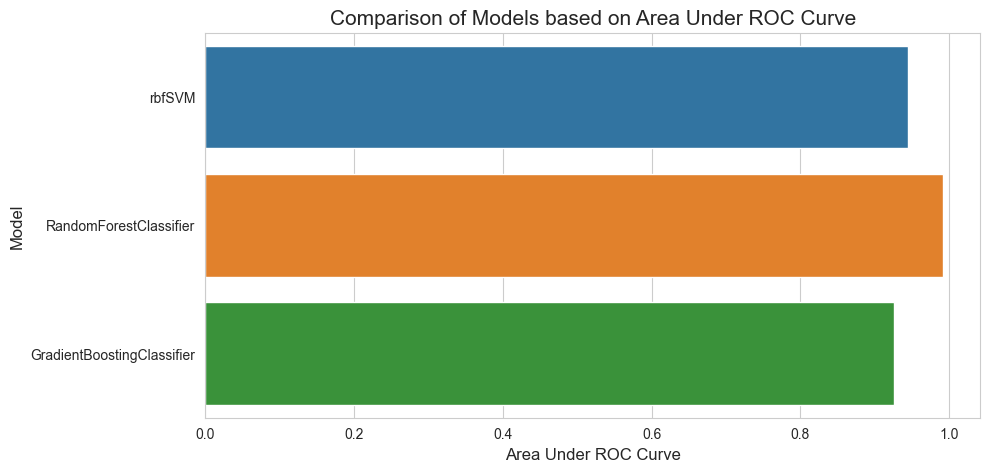

In [66]:
comp_models(met_df,'Area Under ROC Curve')

In [67]:
def comp_models(df, metric):
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    sns.pointplot(x=metric,y='Modelling Algo',data=df)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.title("Comparison of Models based on " + metric, fontsize=15)
    plt.show()


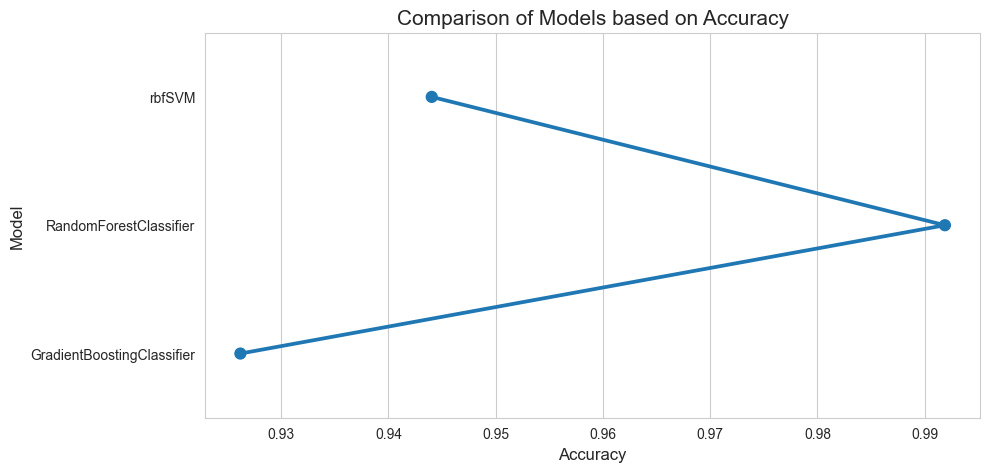

In [68]:
comp_models(met_df,'Accuracy')

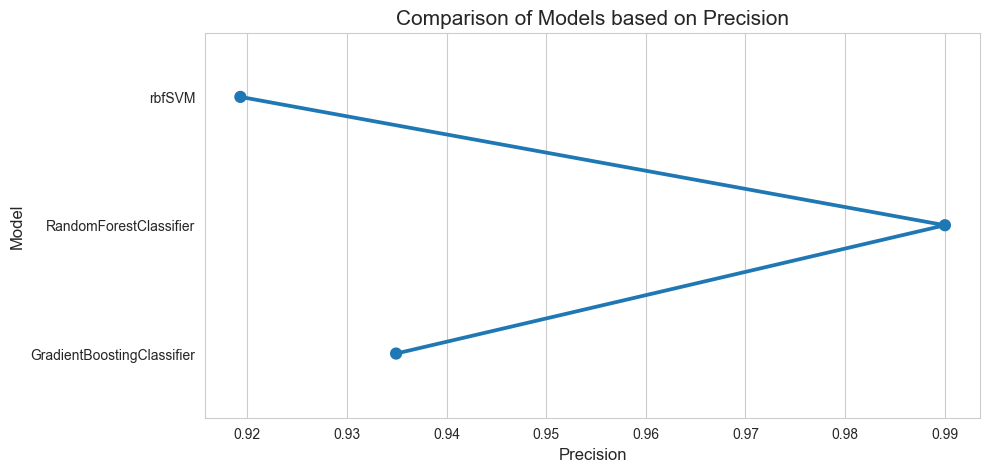

In [69]:
comp_models(met_df,'Precision')

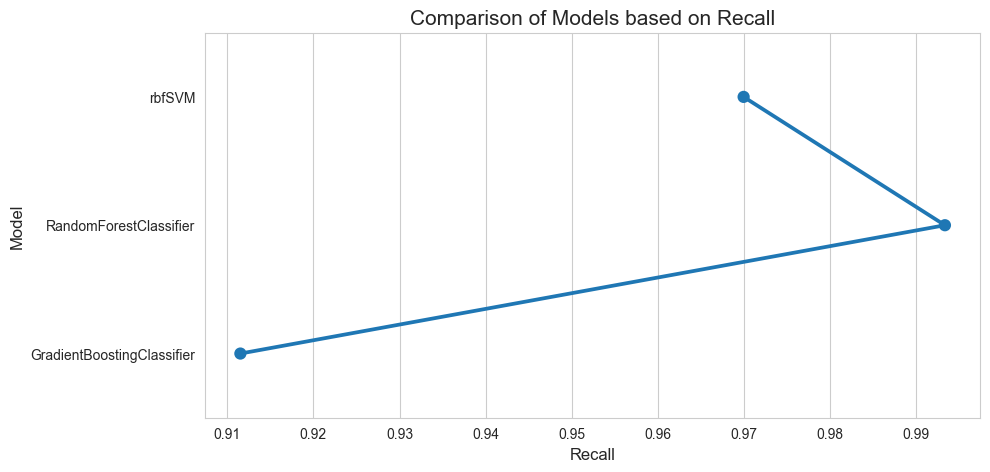

In [70]:
comp_models(met_df,'Recall')

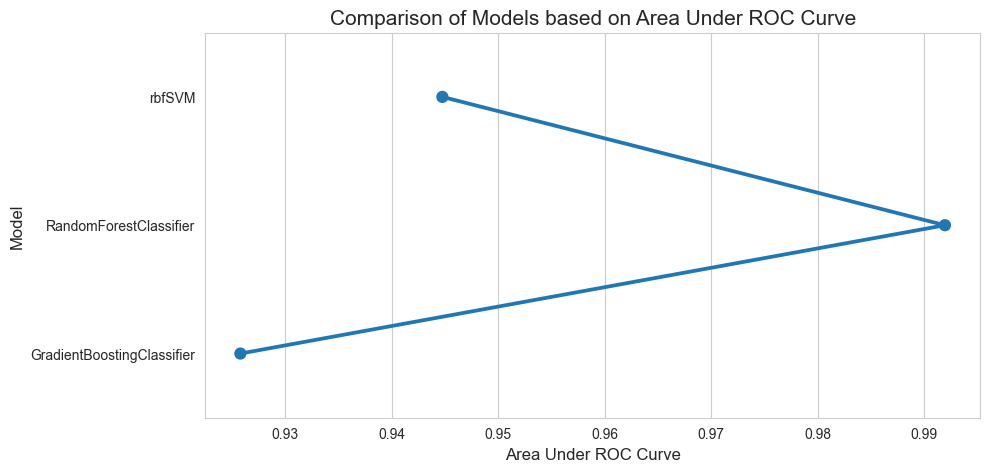

In [71]:
comp_models(met_df,'Area Under ROC Curve')

# Conclusions
Hence we have completed the analysis of the data and also made predictions using the various ML models.